# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

586

In [3]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="

Units = "imperial"

target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=4541ece86e97a697c1b7e203ca11f952'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
# lists to hold info

cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

    
# Loop through the list of cities

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass


Processing record 1 of Set 1 | nanortalik
Processing record 2 of Set 1 | leningradskiy
Processing record 3 of Set 1 | saldanha
Processing record 4 of Set 1 | broken hill
Processing record 5 of Set 1 | labuhan
Processing record 6 of Set 1 | sola
Processing record 7 of Set 1 | isangel
Processing record 8 of Set 1 | mataura
Processing record 9 of Set 1 | half moon bay
Processing record 10 of Set 1 | ribeira grande
Processing record 11 of Set 1 | gao
Processing record 12 of Set 1 | vaini
Processing record 13 of Set 1 | yellowknife
Record not found
Processing record 14 of Set 1 | zhurivka
Processing record 15 of Set 1 | hobart
Processing record 16 of Set 1 | paamiut
Processing record 17 of Set 1 | saskylakh
Processing record 18 of Set 1 | bathsheba
Processing record 19 of Set 1 | eyl
Processing record 20 of Set 1 | iracoubo
Processing record 21 of Set 1 | lac du bonnet
Processing record 22 of Set 1 | rikitea
Processing record 23 of Set 1 | thompson
Processing record 24 of Set 1 | qaanaaq
Pr

Record not found
Processing record 193 of Set 1 | codrington
Processing record 194 of Set 1 | toora-khem
Processing record 195 of Set 1 | namibe
Processing record 196 of Set 1 | ponta delgada
Processing record 197 of Set 1 | narsaq
Processing record 198 of Set 1 | margate
Processing record 199 of Set 1 | pisco
Processing record 200 of Set 1 | talcahuano
Processing record 201 of Set 1 | maceio
Processing record 202 of Set 1 | moyo
Processing record 203 of Set 1 | deder
Processing record 204 of Set 1 | dzhebariki-khaya
Processing record 205 of Set 1 | sao joao da barra
Processing record 206 of Set 1 | alice springs
Processing record 207 of Set 1 | ubinskoye
Processing record 208 of Set 1 | tyukhtet
Processing record 209 of Set 1 | axim
Processing record 210 of Set 1 | rawson
Processing record 211 of Set 1 | kudahuvadhoo
Processing record 212 of Set 1 | meulaboh
Processing record 213 of Set 1 | pangnirtung
Processing record 214 of Set 1 | shenjiamen
Processing record 215 of Set 1 | udachn

Processing record 380 of Set 1 | harper
Processing record 381 of Set 1 | kuna
Processing record 382 of Set 1 | ilulissat
Processing record 383 of Set 1 | paka
Processing record 384 of Set 1 | osinki
Processing record 385 of Set 1 | coquimbo
Processing record 386 of Set 1 | dingle
Processing record 387 of Set 1 | kokstad
Processing record 388 of Set 1 | cheremukhovo
Processing record 389 of Set 1 | yining
Record not found
Processing record 390 of Set 1 | nemuro
Processing record 391 of Set 1 | thinadhoo
Processing record 392 of Set 1 | mago
Processing record 393 of Set 1 | inverell
Processing record 394 of Set 1 | yarkovo
Processing record 395 of Set 1 | novaya zaimka
Processing record 396 of Set 1 | bandarbeyla
Processing record 397 of Set 1 | lorengau
Processing record 398 of Set 1 | moerai
Processing record 399 of Set 1 | marystown
Record not found
Processing record 400 of Set 1 | kitob
Processing record 401 of Set 1 | elda
Processing record 402 of Set 1 | high rock
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,48.87,79,82,6.98,GL,1663243200
1,Leningradskiy,69.3833,178.4167,35.56,99,100,2.73,RU,1663243200
2,Saldanha,-33.0117,17.9442,77.05,60,70,8.37,ZA,1663243200
3,Broken Hill,-31.9500,141.4333,57.72,35,25,11.65,AU,1663243200
4,Labuhan,-6.8844,112.2051,83.39,67,52,5.95,ID,1663243200


In [8]:
# Export the City_Data into a csv
weather_data.to_csv("my_weather_data.csv")
weather_data.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,48.87,79,82,6.98,GL,1663243200
1,Leningradskiy,69.3833,178.4167,35.56,99,100,2.73,RU,1663243200
2,Saldanha,-33.0117,17.9442,77.05,60,70,8.37,ZA,1663243200
3,Broken Hill,-31.9500,141.4333,57.72,35,25,11.65,AU,1663243200
4,Labuhan,-6.8844,112.2051,83.39,67,52,5.95,ID,1663243200
5,Sola,-13.8833,167.5500,80.56,76,26,15.30,VU,1663243200
6,Isangel,-19.5500,169.2667,72.45,85,35,11.50,VU,1663243200
7,Mataura,-46.1927,168.8643,46.47,98,100,7.45,NZ,1663243200
8,Half Moon Bay,37.4636,-122.4286,58.84,92,100,2.98,US,1663243200
9,Ribeira Grande,38.5167,-28.7000,77.40,88,40,20.56,PT,1663243200


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

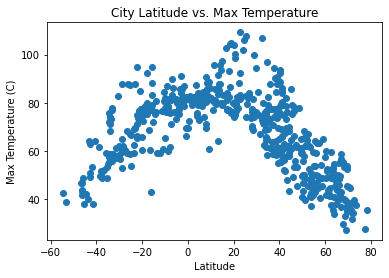

In [9]:
lat = weather_data["Latitude"]
temp = weather_data["Max Temp"]

plt.scatter(lat,temp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()


## Latitude vs. Humidity Plot

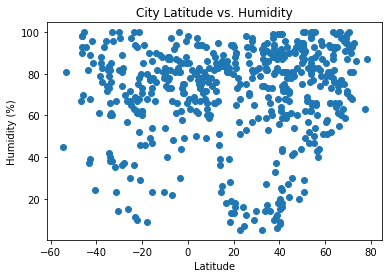

In [10]:
hum = weather_data["Humidity"]

plt.scatter(lat,hum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()


## Latitude vs. Cloudiness Plot

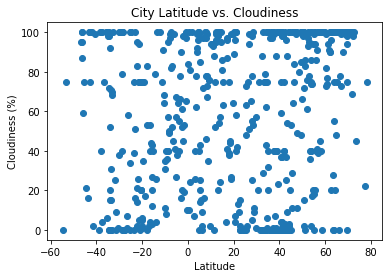

In [11]:
cloud = weather_data["Cloudiness"]

plt.scatter(lat,cloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()


## Latitude vs. Wind Speed Plot

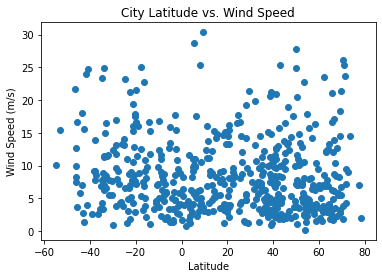

In [12]:
wind = weather_data["Wind Speed"]

plt.scatter(lat,wind)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()


## Linear Regression

In [13]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,48.87,79,82,6.98,GL,1663243200
1,Leningradskiy,69.3833,178.4167,35.56,99,100,2.73,RU,1663243200
8,Half Moon Bay,37.4636,-122.4286,58.84,92,100,2.98,US,1663243200
9,Ribeira Grande,38.5167,-28.7000,77.40,88,40,20.56,PT,1663243200
10,Gao,16.6362,1.6370,102.90,18,4,7.47,ML,1663243200


The r-squared is: -0.7981488723467455


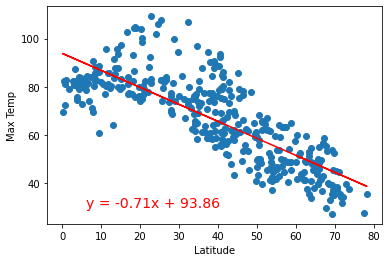

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7316073384139318


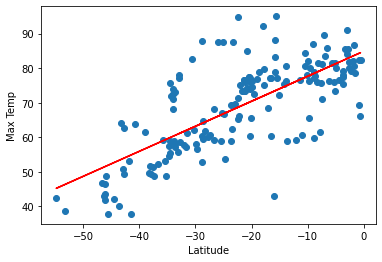

The high r value indicates a strong positive correlation between latitude and max temperature.


<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

print("The high r value indicates a strong positive correlation between latitude and max temperature.")


### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12933322349508636


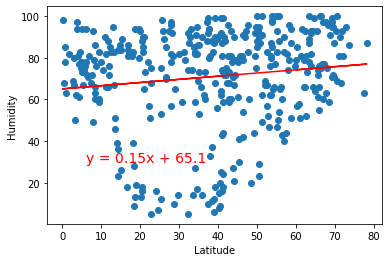

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003258311933052103


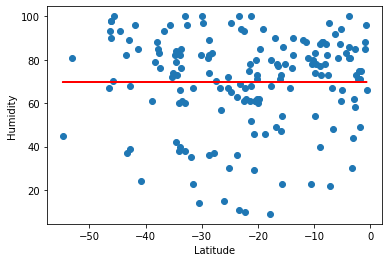

The low r values indicate a weak to no relationship between humidity and latitude.


<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

print("The low r values indicate a weak to no relationship between humidity and latitude.")


### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17330200830510478


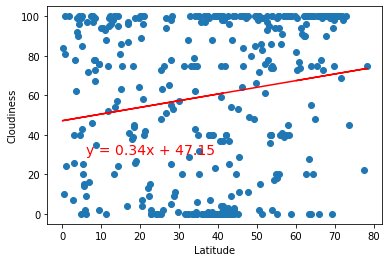

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.05061442178084439


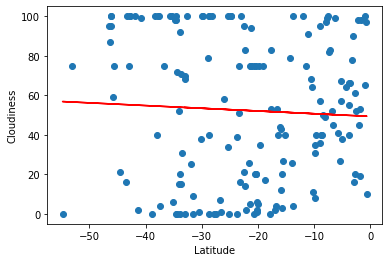

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')


### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021966333851045322


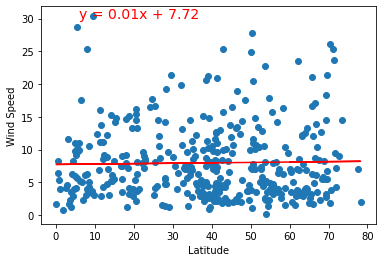

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.184204921206676


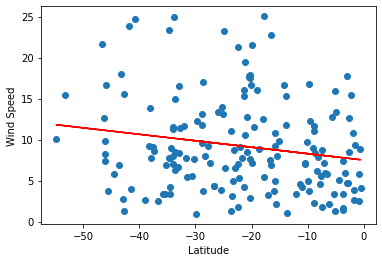

The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')

print("The low r values indicate that there is no real relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")
